# Create a valid Directory 

In [1]:
#PATH containing learn, test directories
PATH = "../../data/mnistasjpg/"

In [2]:
'''import os
from random import shuffle
import shutil

for folder in list(os.listdir(PATH)):
    # Check if the train folder is available
    if folder == 'train':
        # Create the valid directory
        os.mkdir(f"{PATH}valid")
            
        # list of classes
        for Class in list(os.listdir(f"{PATH}train")):
            filesList = os.listdir(f"{PATH}train/{Class}")
            print(f"Size of class {Class}:", len(filesList))
            p = 0.2
            validSize = int(len(filesList)*p)
            print("Size of valid:", validSize)
            # Shuffle the list of files
            #shuffle(filesList)
            validFiles = []
            counter = 0
            for file in filesList:
                if counter < validSize:
                    validFiles.append(file)
                counter = counter+1
            
            # Create a new directory for each class
            os.mkdir(f"{PATH}valid/{Class}")
                
            for file in validFiles:
                shutil.move(f"{PATH}train/{Class}/{file}", f"{PATH}valid/{Class}")
                
print("Done")

Size of class 0: 4132
Size of valid: 826
Size of class 1: 4684
Size of valid: 936
Size of class 2: 4177
Size of valid: 835
Size of class 3: 4351
Size of valid: 870
Size of class 4: 4072
Size of valid: 814
Size of class 5: 3795
Size of valid: 759
Size of class 6: 4137
Size of valid: 827
Size of class 7: 4401
Size of valid: 880
Size of class 8: 4063
Size of valid: 812
Size of class 9: 4188
Size of valid: 837
Done


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
# what's in our PATH?
!ls {PATH}

models	test  tmp  train  valid


# Get a sample 

In [5]:
images = (os.listdir(f'{PATH}test'))[:10]
images

['img_1.jpg',
 'img_10.jpg',
 'img_100.jpg',
 'img_1000.jpg',
 'img_10000.jpg',
 'img_10001.jpg',
 'img_10002.jpg',
 'img_10003.jpg',
 'img_10004.jpg',
 'img_10005.jpg']

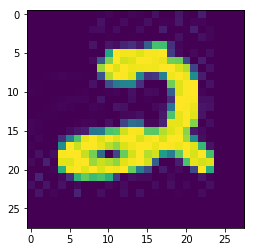

In [6]:
from random import shuffle
shuffle(images)
img = plt.imread(f'{PATH}test/{images[0]}')
plt.imshow(img)

# How computer see images? 

In [7]:
img[10:20, 10:20]

array([[  2,   4,   0,  11,   0,   7,   6,   0,  75, 244],
       [  0,   0,   0,   9,   0,   2,   0,   0,  34, 255],
       [  0,  13,  11,   0,   0,   0,   6,  12,  99, 255],
       [  0,   0,   5,   6,  11,   0,   0,  17, 184, 247],
       [ 11,   0,  51,  94,  85,   5,   5,  25, 246, 246],
       [182, 189, 237, 253, 252, 191, 190, 227, 243, 252],
       [255, 244, 255, 255, 242, 251, 255, 240, 255, 255],
       [229, 212, 242, 250, 255, 255, 248, 255, 253, 249],
       [  0,  53, 196, 238, 255, 227, 238, 142, 109, 193],
       [226, 213, 244, 251, 255, 239,  77,   0,   0,  20]], dtype=uint8)

In [8]:
size = 24 # Size of image
arch = resnet34 # The model used
# Transformations
tfms = tfms_from_model(arch, size) # Transforming the data
data = ImageClassifierData.from_paths(PATH, tfms=tfms) # Reads the data and provides a dataset ready for use

In [9]:
# Create the Learner(Model)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [10]:
learn.fit(0.01, 3) # Training with 3 epoches

epoch      trn_loss   val_loss   accuracy                     
    0      0.350492   0.234742   0.928776  
    1      0.275696   0.198058   0.937351                     
    2      0.300548   0.177364   0.942949                     



[0.17736380209009553, 0.9429490233728465]

In [11]:
learn.precompute = False # Turn off precompute to use data augmentation

In [12]:
learn.fit(1e-2, 3, cycle_len=1) # Training with 3 epoches

epoch      trn_loss   val_loss   accuracy                    
    0      0.256006   0.16062    0.94676   
    1      0.27008    0.160527   0.947594                    
    2      0.23609    0.15646    0.950572                    



[0.15646038546256646, 0.9505717008383062]

In [13]:
# solve under fitting by giving the learner a longer look at the data
learn.fit(1e-2, 3, cycle_len=1, cycle_mult= 2)# 3 cycles(each has 1 epoch) with mult = 1 + 2 + 4 = 7 epoches

epoch      trn_loss   val_loss   accuracy                    
    0      0.233691   0.149241   0.953073  
    1      0.239414   0.150881   0.953311                    
    2      0.218274   0.149048   0.953311                    
    3      0.210244   0.144003   0.953788                    
    4      0.205287   0.143123   0.957242                    
    5      0.228036   0.134466   0.957242                    
    6      0.189717   0.13776    0.957837                    



[0.13776026116688517, 0.9578370652975725]

In [14]:
lrf = learn.lr_find() # Finding the best learning rate

 76%|███████▌  | 401/526 [00:09<00:03, 33.86it/s, loss=0.608]


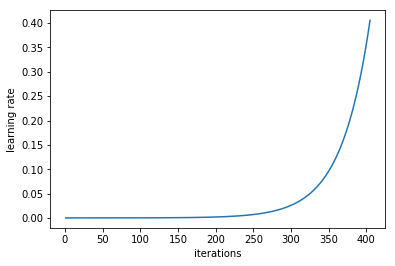

In [15]:
learn.sched.plot_lr()

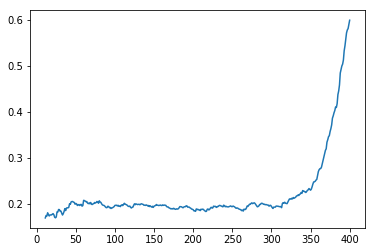

In [16]:
learn.sched.plot_loss()

In [17]:
lr = 0.2

In [18]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.315687   0.178825   0.941996  
    1      0.364787   0.183384   0.940924                    
    2      0.218554   0.148181   0.949976                    
    3      0.34752    0.240818   0.92425                     
    4      0.290443   0.164779   0.947356                    
    5      0.194982   0.13806    0.95343                     
    6      0.196261   0.13165    0.95474                     



[0.13165028910798196, 0.9547403525772294]

In [19]:
# Differential learning rates
lrs = np.array([lr/9, lr/3, lr]) # Set a learning rate for each group of layers

In [20]:
learn.unfreeze() #unfreeze the earlier layers to train instead of the last one only

In [21]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      0.184628   0.048925   0.985946  
    1      0.12096    0.052976   0.983444                     
    2      0.099839   0.037996   0.989042                     
    3      0.211947   0.069372   0.983206                     
    4      0.099453   0.03877    0.988804                     
    5      0.108377   0.028706   0.992139                     
    6      0.170596   0.03141    0.991901                     



[0.03140996108980776, 0.991900905192949]

In [22]:
learn.save('All') # Saving 

In [23]:
learn.load('All') # Loading

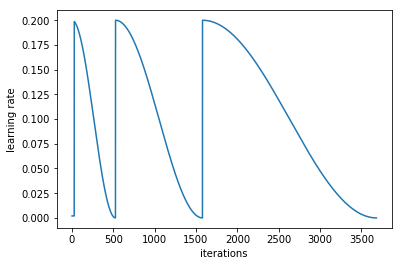

In [24]:
learn.sched.plot_lr() # The Change of Learning rate each cycle (SGDR)

In [25]:
log_preds, y = learn.TTA() # Test Time Augmentation, gives a better accuracy

In [26]:
probs = np.mean(np.exp(log_preds), 0)

# Accuracy 

In [27]:
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.991900905192949, 0.0314100310204471)

In [28]:
# confusion matrix
preds = np.argmax(probs, axis=1)
probs = probs[:, 1]

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[824   0   0   1   0   0   0   1   0   0]
 [  0 934   0   0   0   0   0   2   0   0]
 [  0   1 828   1   1   0   0   2   1   1]
 [  0   0   0 864   0   2   0   0   3   1]
 [  0   0   0   0 805   0   3   3   0   3]
 [  0   0   1   3   0 753   0   0   2   0]
 [  1   0   1   0   3   3 814   0   5   0]
 [  0   1   1   1   0   0   0 877   0   0]
 [  1   1   1   2   2   1   0   1 802   1]
 [  0   0   0   0   6   2   0   1   1 827]]


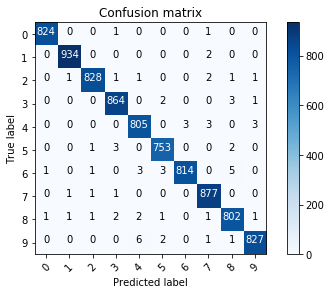

In [30]:
plot_confusion_matrix(cm, data.classes) # True Labels VS predicted Labels